#  Employee turnover prediction


In [1]:
# importing necessary libs
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("employee.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
print("Number of rows:",df.shape[0],"\nNumber of columns:",df.shape[1])

Number of rows: 1470 
Number of columns: 35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Data wrangling


In [9]:
#removing unwanted columns

df.drop(columns = ['EmployeeCount','StandardHours','Over18','EmployeeNumber'],inplace = True)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


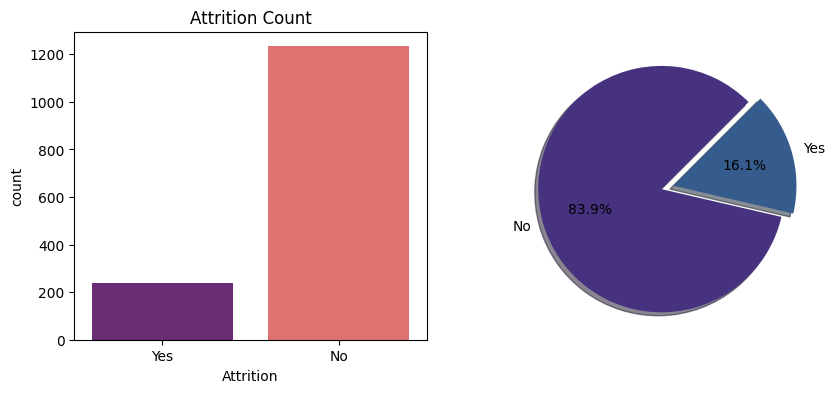

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x="Attrition",data = df , palette='magma',hue="Attrition")
plt.title('Attrition Count')

plt.subplot(1,2,2)
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
        startangle=45,explode =(0.1,0), shadow=True, colors=sns.color_palette('viridis'))
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

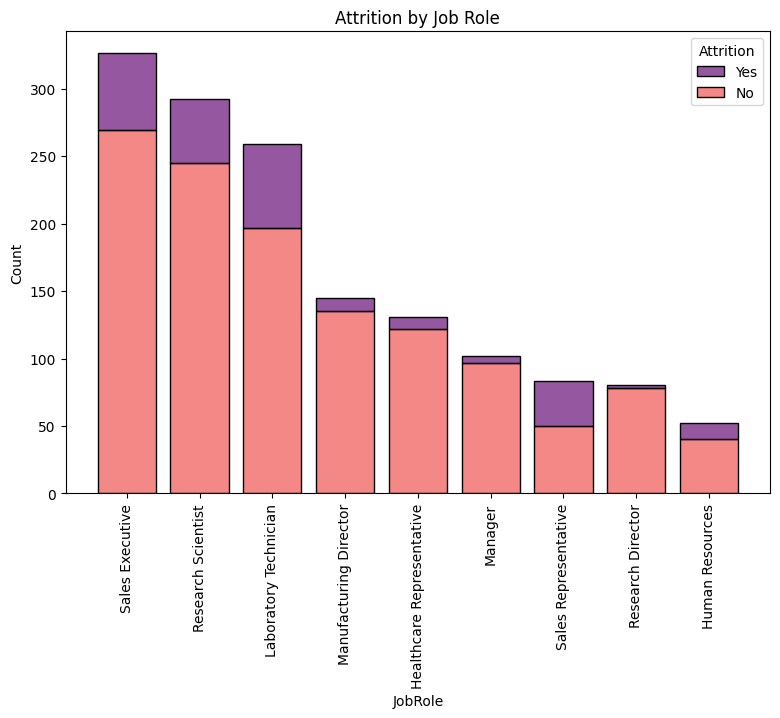

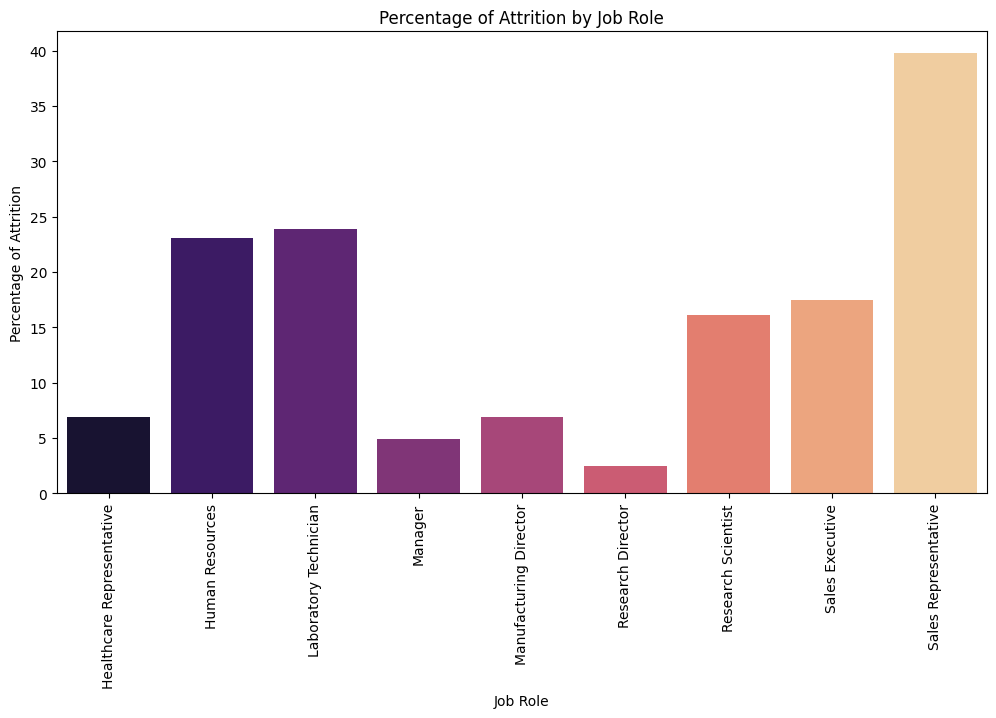

In [11]:
# ATTRITION BY JOB ROLE

df[df['Attrition'] == 'Yes']['JobRole'].value_counts() 

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='JobRole',bins=20,multiple='stack',hue = 'Attrition',palette='magma',discrete=True,shrink=.8)
plt.title("Attrition by Job Role")
plt.xticks(rotation = 90)

#percentage of attrition
attrition_by_role = df[df['Attrition'] == 'Yes'].groupby('JobRole').size() / df.groupby('JobRole').size() * 100

attrition_by_role = attrition_by_role.reset_index()
attrition_by_role.columns = ['JobRole', 'Attrition (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='Attrition (%)', data=attrition_by_role, palette='magma')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Job Role')
plt.xticks(rotation=90) 
plt.show()


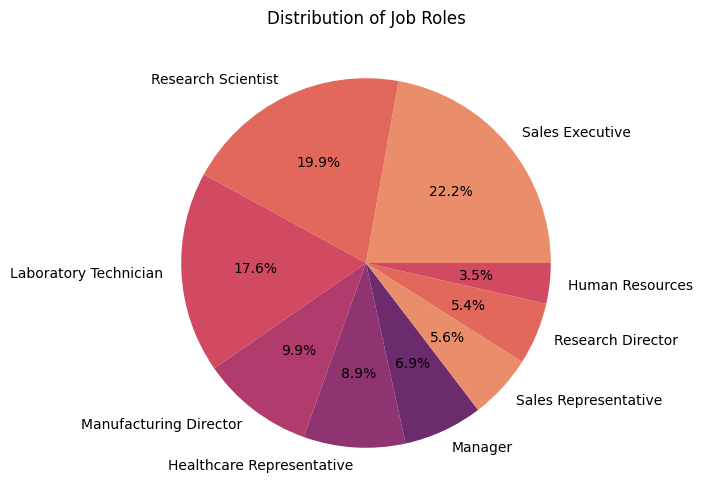

In [12]:
plt.figure(figsize=(16,6))
plt.pie(df['JobRole'].value_counts(),labels=df['JobRole'].value_counts().index,colors=sns.color_palette('flare'), autopct='%1.1f%%')
plt.title("Distribution of Job Roles")
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Attrition by Department')

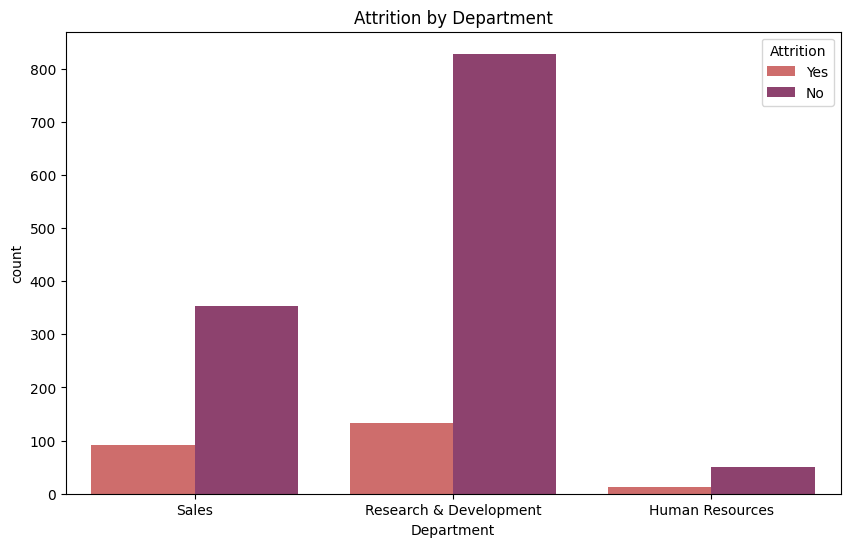

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department',hue = 'Attrition',data= df,palette='flare')
plt.title("Attrition by Department")

In [14]:
fig = px.histogram(df, x='Department', y='MonthlyIncome', color='Department',
             title="Average Monthly Income Across Different Departments",histfunc='avg')
fig.update_layout(xaxis_title='Department', yaxis_title='Monthly Income')
fig.show()


In [15]:
fig = px.histogram(df, y='MonthlyIncome', x='JobRole', color="Department",
             title="Average Monthly Income Across Different Job Roles", histfunc='avg', barmode='group')
fig.update_layout(xaxis_title='Job Role', yaxis_title='MonthlyIncome', height=600)
fig.show()

In [16]:
c = df.groupby(['YearsAtCompany','Attrition']).size().reset_index(name = 'Count')
t_c = df.groupby('YearsAtCompany').size().reset_index(name= 'Total')

c = c.merge(t_c,on = 'YearsAtCompany')
c['Percentage'] = (c["Count"] / c["Total"]) *100

fig = px.line(c,x='YearsAtCompany',y='Percentage',color = 'Attrition',markers = True,color_discrete_sequence=['red','green'],title='Percentage Line Plot of YearsAtCompany Grouped by Attrition')

fig.update_layout(xaxis_title="YearsAtCompany",
                  yaxis_title="Percentage",
                  legend_title = "Attrition",
                  hovermode = "x unified")
fig.show()



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When groupi

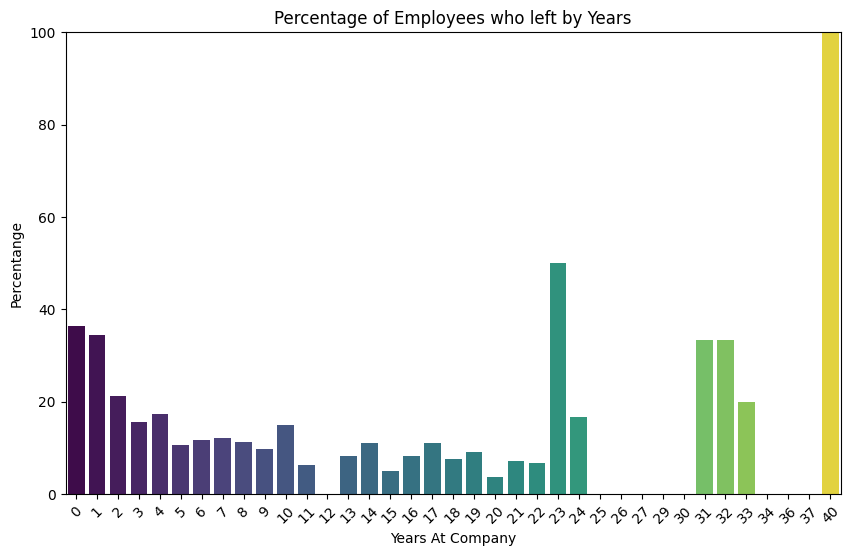

In [17]:
members_left = df [df["Attrition"] == "Yes"]

total_members = df.groupby('YearsAtCompany').size()
members_left_count = members_left.groupby('YearsAtCompany').size()

data = (members_left_count/total_members *100).fillna(0).reset_index(name = "Percentage")

plt.figure(figsize = (10,6))
sns.barplot(data = data,hue = 'YearsAtCompany',y = 'Percentage',palette='viridis',legend=False,x = "YearsAtCompany")
plt.title("Percentage of Employees who left by Years")
plt.xlabel("Years At Company")
plt.ylabel("Percentange")
plt.xticks(rotation = 45)
plt.ylim(0,100)
plt.show()

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 2000x600 with 0 Axes>

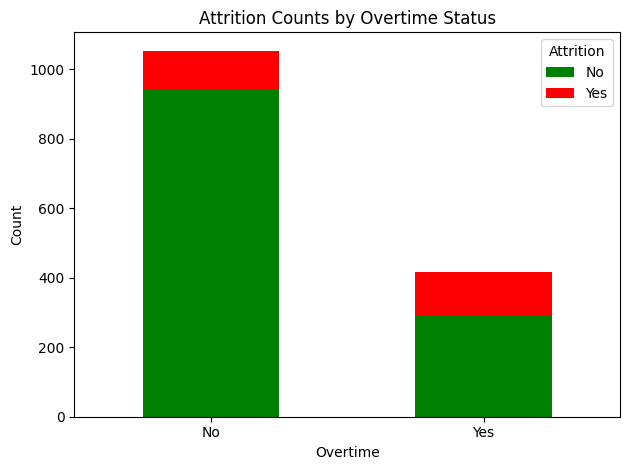

In [19]:
attrition_count = df.groupby(["OverTime",'Attrition']).size().unstack()

plt.figure(figsize=(20,6))
attrition_count.plot(kind = 'bar',stacked = 'True',color = {'Yes':'red', 'No' : 'green'})
plt.xlabel('Overtime')
plt.ylabel("Count")
plt.title("Attrition Counts by Overtime Status")
plt.legend(title = 'Attrition')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [20]:
att_job_satisfaction = df[df["Attrition"] == "Yes"].groupby("JobSatisfaction").size()/df.groupby("JobSatisfaction").size() *100
att_job_satisfaction=att_job_satisfaction.reset_index()
att_job_satisfaction.columns = ['JobSatisfaction','Percentage']
att_job_satisfaction


,JobSatisfaction,Percentage
0,1,22.837370
1,2,16.428571
2,3,16.515837
3,4,11.328976


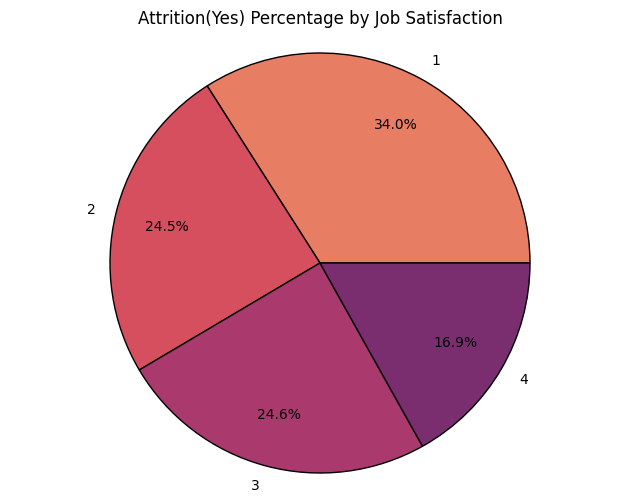

In [21]:
plt.figure(figsize=(8,6))
plt.pie(att_job_satisfaction['Percentage'],labels=att_job_satisfaction['JobSatisfaction'],
        autopct='%1.1f%%',
        colors = sns.color_palette('flare',len(att_job_satisfaction)),
        wedgeprops={'edgecolor' : 'black'},
        pctdistance=0.75)
        #textprops={'fontsize': 14})
plt.title("Attrition(Yes) Percentage by Job Satisfaction")
plt.axis('equal')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When groupi

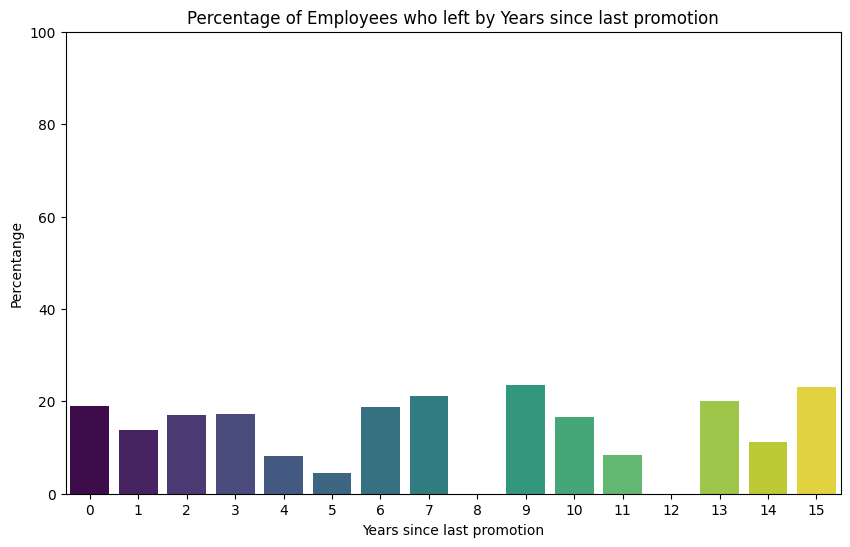

In [22]:
#employees who left the company
members_left = df [df["Attrition"] == "Yes"]

total_members = df.groupby('YearsSinceLastPromotion').size()
members_left_count = members_left.groupby('YearsSinceLastPromotion').size()

data = (members_left_count/total_members *100).fillna(0).reset_index(name = "Percentage")

plt.figure(figsize = (10,6))
sns.barplot(data = data,hue = 'YearsSinceLastPromotion',y = 'Percentage',palette='viridis',legend=False,x = "YearsSinceLastPromotion")
plt.title("Percentage of Employees who left by Years since last promotion")
plt.xlabel("Years since last promotion")
plt.ylabel("Percentange")
plt.ylim(0,100)
plt.show()

In [23]:
#Does overtime impacts performance rating
fig = px.histogram(df,x = "OverTime",y= "PerformanceRating",
                   color = 'PerformanceRating',histfunc = 'count',
                   title="Performance Rating by OverTime",height=600,width=800)
fig.update_layout(xaxis_title = 'Overtime',yaxis_title = "Performance Rating")
fig.show()

In [24]:
#Attrition by Business Travel Frequency
fig = px.histogram(df,x = "BusinessTravel",histfunc="count",color = "Attrition",color_discrete_map={'Yes' : "red",'No' : 'Green'},
                   barmode = "group",title="Attrition by Business Trave frequencey",text_auto=True,height=600,width=600)
fig.update_layout(xaxis_title = "Business Travel",yaxis_title = "Count")
fig.show()


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When groupi

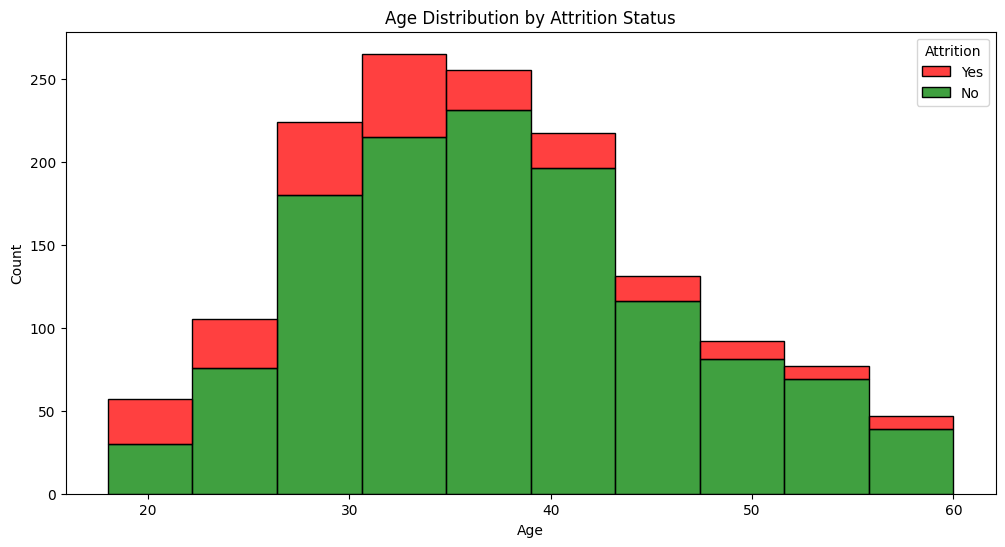

In [25]:
#Age vs Attrition
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette={'Yes': 'red', 'No': 'green'}, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Attrition Status')
plt.show()

In [26]:

#Attrition by Business Travel Frequency
fig = px.histogram(df,x = "WorkLifeBalance",histfunc="count",color = "Attrition",color_discrete_map={'Yes' : "red",'No' : 'Green'},
                   barmode = "group",title="Attrition by WorkLifeBalance",text_auto=True,height=600,width=600)
fig.update_layout(xaxis_title = "Worklife Balance",yaxis_title = "Count")
fig.show()

In [27]:
df_copy = df.copy()

le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Gender','OverTime']])


In [28]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

df1 = pd.concat([df, encoded_df],axis=1)
df1 = df1.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime'],axis =1)


df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int32  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   HourlyRate                         1470 non-null   int64  
 7   JobInvolvement                     1470 non-null   int64  
 8   JobLevel                           1470 non-null   int64  
 9   JobSatisfaction                    1470 non-null   int64  
 10  MonthlyIncome                      1470 non-null   int64  
 11  MonthlyRate                        1470 non-null   int64

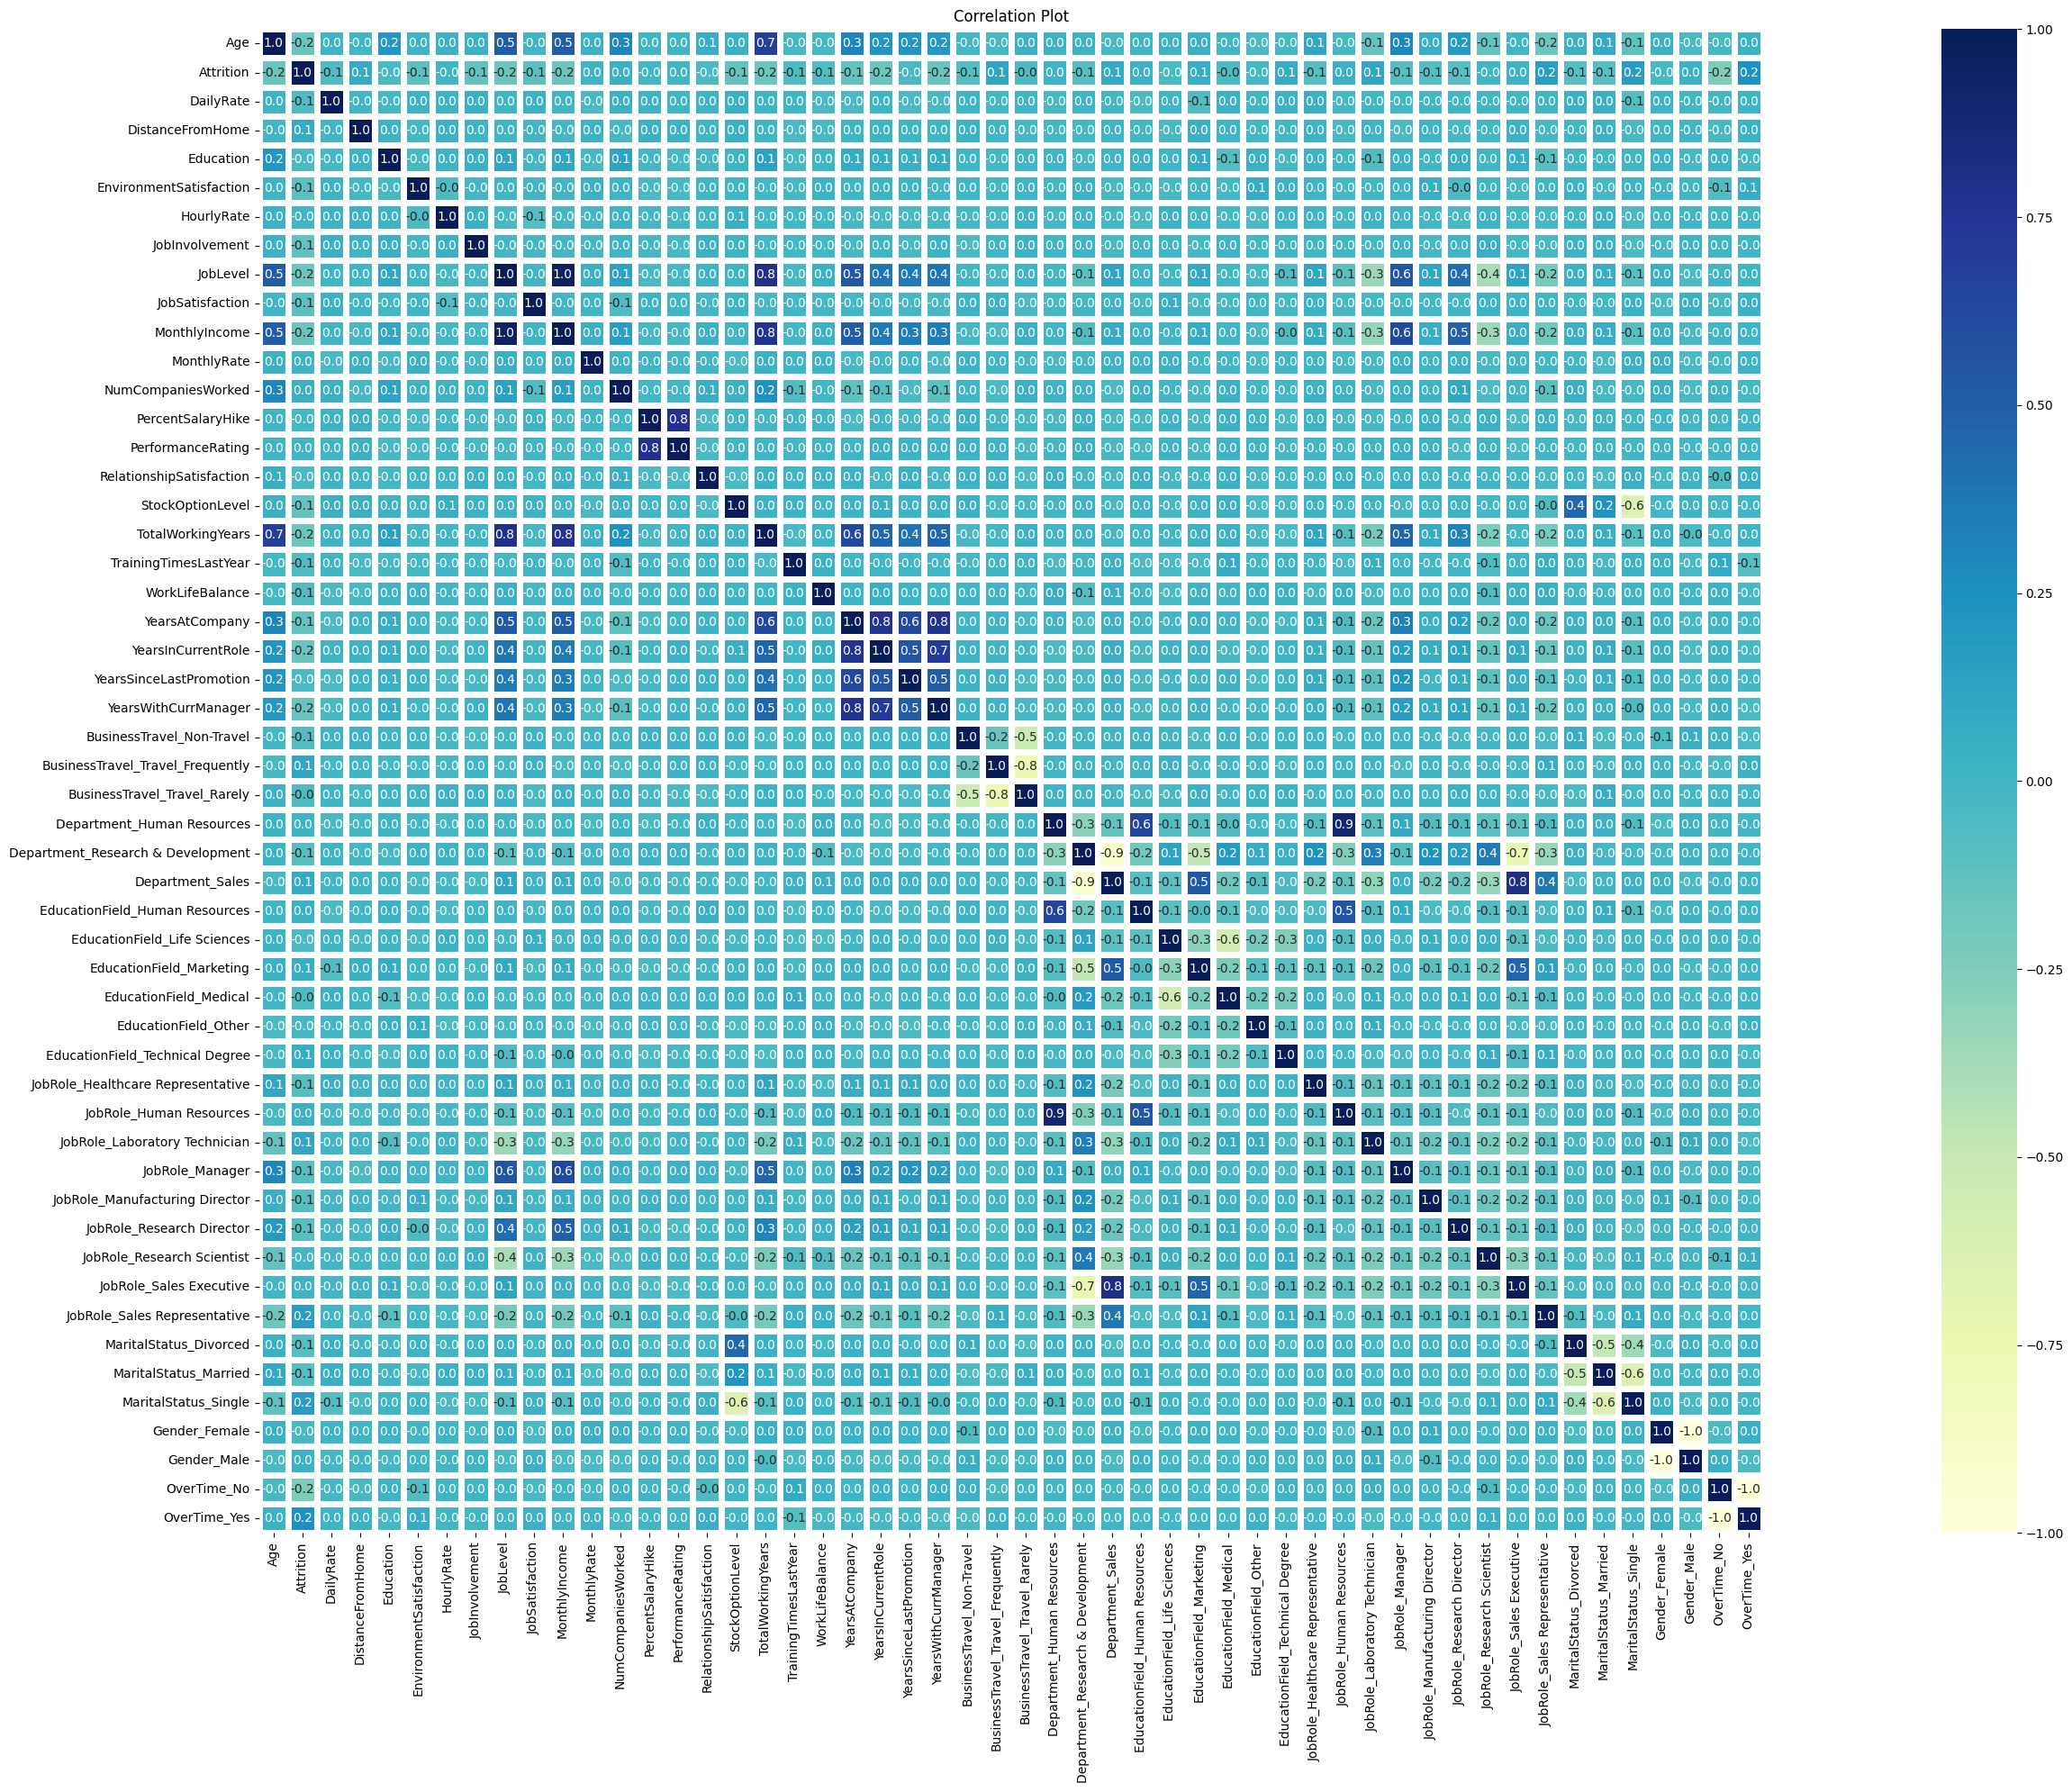

In [29]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df1.corr(numeric_only=True),linewidths=5, annot=True, square=True,cmap='YlGnBu', fmt=".1f")
plt.tight_layout()
plt.show()

Model Development

In [30]:
X = df1.drop(columns = "Attrition")
y = df1["Attrition"]


In [31]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(pd.Series(y).value_counts())

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [32]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [33]:
pd.set_option("display.max_columns",None)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
1181,49,465,6,1,3,41,2,4,3,13966,11652,2,19,3,2,1,30,3,3,15,11,2,12,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
102,20,871,6,3,4,66,2,1,4,2926,19783,1,18,3,2,0,1,5,3,1,0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1273,22,1294,8,1,3,79,3,1,1,2398,15999,1,17,3,3,0,1,6,3,1,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1266,41,548,9,4,3,94,3,1,1,2289,20520,1,20,4,2,2,5,2,3,5,3,0,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
180,31,140,12,1,3,95,3,1,4,3929,6984,8,23,4,3,1,7,0,3,4,2,0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Scaling


In [34]:
scaler = StandardScaler()
 
X_train[["Age", "MonthlyIncome"]] = scaler.fit_transform(X_train[["Age", "MonthlyIncome"]])
X_test[["Age","MonthlyIncome"]] = scaler.fit_transform(X_test[["Age", "MonthlyIncome"]])

Random forest classifier


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
RF_model = RandomForestClassifier(n_estimators=200)
RF_model.fit(X_train , y_train)
RF_model.score(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print( 'accuracy score: ' ,accuracy_score(y_test , RF_pred))

accuracy score:  0.9448946515397083
